In [5]:
#import Libraries
import pandas as pd
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import Classification libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding = "ISO-8859-1")

In [11]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [12]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [14]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,...,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,...,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1065.679090,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,1.021334e+07,0.391842,5276.541078,1065.679090,3818.085460,1.342831e+09,NaN,231.156869,4.859280,4.531500,11.850291,14.617203,NaN,NaN,32.755244,51.296654,222.898475,209.843126,NaN,NaN,6.928203,0.312482,1.809258e+0

In [15]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [16]:
df.shape

(4194, 181)

In [17]:
#remove all object datatypes and assign it to a new dataframe
df_new=df.select_dtypes(exclude="object") 

In [18]:
df_new # df with only int or float datatypes

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
0,797,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,NaN,NaN,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,64.29,NaN,NaN,NaN,NaN,3.0,1.426019e+09,64.29,NaN,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,...,NaN,NaN,2310.0,0.0,NaN,1.0,3.0,NaN,80.70,57.64,NaN,44.00,0.0,NaN,NaN,1.463163e+09,1.0,1.088440e+13,62.0,NaN,NaN,NaN,NaN,NaN,1.450325e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,136.0,NaN,0.0,NaN,24.80,7.50,30.40,NaN,NaN,NaN,0.0,NaN
1,3,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,NaN,NaN,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,NaN,NaN,NaN,3.0,1.386090e+09,29.99,NaN,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31,23,177.0,...,NaN,2.0,177.0,1.0,NaN,1.0,3.0,NaN,14.41,10.29,5.00,1.87,65.0,NaN,NaN,1.462370e+09,1.0,1.008020e+13,62.0,NaN,NaN,NaN,199.0,22005.0,1.450322e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,0.0,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN
2,3,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,NaN,NaN,NaN,68.78,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,NaN,NaN,NaN,3.0,1.449604e+09,78.73,NaN,NaN,3,1449603652,1.450213e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11655,9531,1.0,...,NaN,NaN,1.0,0.0,NaN,1.0,3.0,NaN,96.29,68.78,NaN,52.50,32896.0,NaN,NaN,1.463163e+09,1.0,4.008020e+13,62.0,NaN,NaN,NaN,199.0,22005.0,1.450321e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,800.0,NaN,0.0,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,0.0,NaN
3,4,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,NaN,NaN,NaN,19.56,0.00,9.95,NaN,NaN,NaN,NaN,0.04,NaN,29.55,NaN,NaN,NaN,NaN,3.0,1.386780e+09,29.55,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1816,29,983.0,...,NaN,NaN,983.0,0.0,NaN,1.0,3.0,NaN,27.38,19.56,NaN,12.62,0.0,NaN,NaN,1.462595e+09,1.0,NaN,62.0,NaN,NaN,NaN,199.0,22005.0,1.450323e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8.019675e+10,1.0,NaN,0.0,NaN,NaN,NaN,NaN,10.60,7.80,18.50,NaN,NaN,NaN,NaN,NaN
4,5,1386861599,0.0,0.0,NaN,NaN,NaN,N

In [21]:
#Remove missing values.
#‘all’ : If all values are NA, drop that column
df_new.dropna(axis=1,how="all",inplace=True)

In [22]:
df_new

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Order_Items.flags,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_price,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.saved_status
0,797,1426018724,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,NaN,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,64.29,NaN,NaN,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,NaN,NaN,0.0,5284,3758,2310.0,1,57.20,44.00,NaN,NaN,2310.0,0.0,1.0,3.0,80.70,57.64,NaN,44.00,0.0,NaN,1.463163e+09,1.0,1.088440e+13,62.0,NaN,NaN,NaN,1.450325e+09,0.0,NaN,NaN,NaN,NaN,1.0,0.0,136.0,NaN,0.0,24.80,7.50,30.40,NaN,NaN,0.0
1,3,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,NaN,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,29.99,NaN,NaN,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,0.0,31,23,177.0,4,5.00,1.87,NaN,2.0,177.0,1.0,1.0,3.0,14.41,10.29,5.00,1.87,65.0,NaN,1.462370e+09,1.0,1.008020e+13,62.0,NaN,199.0,22005.0,1.450322e+09,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,8.00,7.00,1.50,NaN,NaN,NaN
2,3,1386089139,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,NaN,NaN,68.78,0.00,9.95,NaN,NaN,NaN,NaN,78.73,NaN,NaN,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,NaN,NaN,NaN,0.0,11655,9531,1.0,1,68.78,52.50,NaN,NaN,1.0,0.0,1.0,3.0,96.29,68.78,NaN,52.50,32896.0,NaN,1.463163e+09,1.0,4.008020e+13,62.0,NaN,199.0,22005.0,1.450321e+09,0.0,NaN,NaN,NaN,NaN,800.0,0.0,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,0.0
3,4,1386780263,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,NaN,NaN,19.56,0.00,9.95,NaN,NaN,0.04,NaN,29.55,NaN,NaN,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,NaN,NaN,0.0,1816,29,983.0,1,19.56,12.62,NaN,NaN,983.0,0.0,1.0,3.0,27.38,19.56,NaN,12.62,0.0,NaN,1.462595e+09,1.0,NaN,62.0,NaN,199.0,22005.0,1.450323e+09,0.0,NaN,NaN,NaN,8.019675e+10,1.0,0.0,NaN,NaN,NaN,10.60,7.80,18.50,NaN,NaN,NaN
4,5,1386861599,0.0,0.0,NaN,NaN,1437764316,0.0,30,5,NaN,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,46.00,NaN,NaN,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,0.0,40,30,991.0,1,36.05,25.75,NaN,NaN,991.0,1.0,1.0,3.0,50.47,36.05,NaN,25.75,0.0,NaN,1.462370e+09,1.0,NaN,62.0,NaN,199.0,22005.0,1.450323e+09,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,8.50,2.75,12.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,1463408698,NaN,1.0,NaN,NaN,1463408698,0.0,17421,3730,NaN,NaN,14.85,1.21,0.00,NaN,NaN,NaN,NaN,16.06,NaN,NaN,3.0,1.463409e+09,16.06,0,1463408854,NaN,NaN,NaN,NaN,0.0,20186,17421,1842.0,1,14.85,15.50,NaN,2.0,1842.0,3.0,1.0,3.0,33.11,23.65,14.85,15.50,32896.0,6.0,1.462370e+09,1.0,8.843890e+1

In [23]:
# we can see that we have many NaN values, so we fill them with their mean value
for i in df_new:
    df_new[i].fillna(df_new[i].mean(),inplace=True)

In [24]:
df_new

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Order_Items.flags,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_price,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.saved_status
0,797,1426018724,0.0,0.979659,0.2,7.333333,1437764306,0.000000,3758,797,7389.158537,6.018061e+08,57.20,0.000000,9.950000,13.000000,2.860000,14.75259,13.086676,64.29,47.981396,18.0,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,1.0,0.010417,0.000000,5284,3758,2310.0,1,57.20,44.00,1.666667,1.916667,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,89.727855,199.0,22005.0,1.450325e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,136.000000,181.696967,0.000000,24.80,7.50,30.40,15.487041,3.863049,0.000000
1,3,1386089139,0.0,0.979659,0.2,7.333333,1437764354,0.000000,23,3,7389.158537,6.018061e+08,20.00,0.800838,9.990000,20.403628,9.972676,14.75259,13.086676,29.99,47.981396,18.0,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,1.0,0.010417,0.000000,31,23,177.0,4,5.00,1.87,1.666667,2.000000,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,89.727855,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,0.000000,181.696967,0.000000,8.00,7.00,1.50,15.487041,3.863049,0.876336
2,3,1386089139,0.0,0.979659,0.2,7.333333,1437764354,0.000000,9531,3,7389.158537,6.018061e+08,68.78,0.000000,9.950000,20.403628,9.972676,14.75259,13.086676,78.73,47.981396,18.0,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,1.0,0.010417,0.000000,11655,9531,1.0,1,68.78,52.50,1.666667,1.916667,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,89.727855,199.0,22005.0,1.450321e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,800.00000,0.0,65.059943,181.696967,0.064423,13.23,10.04,10.24,15.487041,3.863049,0.000000
3,4,1386780263,0.0,0.979659,0.2,7.333333,1437762646,0.000000,29,4,7389.158537,6.018061e+08,19.56,0.000000,9.950000,20.403628,9.972676,0.04000,13.086676,29.55,47.981396,18.0,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,1.0,0.010417,0.000000,1816,29,983.0,1,19.56,12.62,1.666667,1.916667,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,89.727855,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,8.019675e+10,1.00000,0.0,65.059943,181.696967,0.064423,10.60,7.80,18.50,15.487041,3.863049,0.876336
4,5,1386861599,0.0,0.000000,0.2,7.333333,1437764316,0.000000,30,5,7389.158537,6.018061e+08,36.05,0.800838,9.950000,20.403628,9.972676,14.75259,13.086676,46.00,47.981396,18.0,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,1.0,0.010417,0.000000,40,30,991.0,1,36.05,25.75,1.6666

In [35]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [36]:
x=df_new.drop(["Customers.create_date","Customers.last_modified","Orders.reorder_id","Orders.external_id",
                "Orders.payment_date","Orders.placed_date","Orders.updated_date","Orders.shipped_date","Order_Items.id",
               "Order_Items.product_id","Order_Items.reorder_frequency","Order_Items.flags","Products.left_flag",
               "Products.last_modified","Products.shopping_gtin","Products.qb_edit_sequence","Products.length","Products.width",
               "Products.height","Products.upc"],axis=1)

In [37]:
x.sample(5)

,Customers.id,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.parent,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.taxable,Products.shopping_flags,Products.amazon_price,Products.shopping_cat,Products.shopzilla_cat,Products.seo_category,Products.case_qty,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.saved_status
4130,3669,0.0,0.979659,0.2,7.333333,0.137364,17208,3669,68.78,0.0,9.95,32.000000,6.880000,14.75259,13.086676,71.85,0.000000,18.0,3.0,71.85,1,1.0,0.010417,0.0,17208,1,68.78,52.50,16286.0,0.0,5.0,8.0,75.00,68.78,70.754095,52.50,9549.46468,0.940858,62.0,89.727855,199.0,22005.0,0.0,162.88514,0.166438,64.000000,181.696967,0.064423,11.000000,8.00000,3.000000,15.487041,3.863049,0.0
2819,2398,0.0,0.979659,0.2,7.333333,0.000000,12330,2398,24.41,0.0,9.95,20.403628,9.972676,14.75259,13.086676,34.36,47.981396,18.0,3.0,34.36,1,1.0,0.010417,0.0,12330,1,24.41,15.75,18286.0,0.0,5.0,8.0,22.50,24.41,70.754095,15.75,9549.46468,0.940858,62.0,89.727855,199.0,22005.0,0.0,162.88514,0.166438,65.059943,181.696967,0.064423,10.000000,2.50000,2.500000,15.487041,3.863049,0.0
2362,1991,0.0,1.000000,0.2,7.333333,0.000000,13444,1991,117.98,0.0,0.00,20.403628,9.972676,14.75259,13.086676,117.98,47.981396,18.0,3.0,117.98,1,1.0,0.010417,0.0,13444,2,58.99,44.00,21950.0,3.0,1.0,3.0,101.44,72.46,58.990000,42.00,0.00000,1.000000,62.0,89.727855,199.0,22005.0,0.0,6.00000,1.000000,256.000000,181.696967,0.000000,16.200000,12.40000,5.500000,15.487041,3.863049,3.0
3364,2899,0.0,1.000000,0.2,7.333333,0.000000,14357,2899,24.99,0.0,9.05,20.403628,9.972676,14.75259,9.050000,24.99,47.981396,18.0,3.0,24.99,1,1.0,0.000000,0.0,14357,1,24.99,11.88,13475.0,3.0,1.0,3.0,39.99,32.66,24.990000,11.88,98433.00000,1.000000,30.0,89.727855,199.0,22005.0,0.0,3.00000,0.000000,256.000000,181.696967,0.000000,17.208216,10.87275,11.592447,15.487041,0.000000,3.0
3398,2936,0.0,1.000000,0.2,7.333333,0.000000,14597,2936,34.99,0.0,0.00,20.403628,9.972676,14.75259,13.086676,34.99,47.981396,18.0,3.0,34.99,1,1.0,0.010417,0.0,14597,1,34.99,40.50,17051.0,3.0,5.0,8.0,89.99,52.36,37.990000,24.00,0.00000,0.000000,62.0,89.727855,199.0,22005.0,0.0,162.88514,1.000000,72.000000,181.696967,0.000000,10.000000,4.00000,16.000000,15.487041,3.863049,3.0


In [89]:
model=KMeans(n_clusters=4)

In [90]:
model=model.fit(x)

In [91]:
tahmin=model.predict(x)

In [92]:
tahmin

array([0, 0, 1, ..., 2, 2, 2])

In [93]:
x["clusters"]=tahmin

In [94]:
x.head()

,Customers.id,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.parent,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.taxable,Products.shopping_flags,Products.amazon_price,Products.shopping_cat,Products.shopzilla_cat,Products.seo_category,Products.case_qty,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.saved_status,clusters
0,797,0.0,0.979659,0.2,7.333333,0.0,3758,797,57.20,0.000000,9.95,13.000000,2.860000,14.75259,13.086676,64.29,47.981396,18.0,3.0,64.29,1,1.0,0.010417,0.0,3758,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,1.0,62.0,89.727855,199.0,22005.0,0.0,1.0,0.0,136.000000,181.696967,0.000000,24.80,7.50,30.40,15.487041,3.863049,0.000000,0
1,3,0.0,0.979659,0.2,7.333333,0.0,23,3,20.00,0.800838,9.99,20.403628,9.972676,14.75259,13.086676,29.99,47.981396,18.0,3.0,29.99,1,1.0,0.010417,0.0,23,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,1.0,62.0,89.727855,199.0,22005.0,0.0,1.0,0.0,0.000000,181.696967,0.000000,8.00,7.00,1.50,15.487041,3.863049,0.876336,0
2,3,0.0,0.979659,0.2,7.333333,0.0,9531,3,68.78,0.000000,9.95,20.403628,9.972676,14.75259,13.086676,78.73,47.981396,18.0,3.0,78.73,3,1.0,0.010417,0.0,9531,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,1.0,62.0,89.727855,199.0,22005.0,0.0,800.0,0.0,65.059943,181.696967,0.064423,13.23,10.04,10.24,15.487041,3.863049,0.000000,1
3,4,0.0,0.979659,0.2,7.333333,0.0,29,4,19.56,0.000000,9.95,20.403628,9.972676,0.04000,13.086676,29.55,47.981396,18.0,3.0,29.55,1,1.0,0.010417,0.0,29,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,1.0,62.0,89.727855,199.0,22005.0,0.0,1.0,0.0,65.059943,181.696967,0.064423,10.60,7.80,18.50,15.487041,3.863049,0.876336,0
4,5,0.0,0.000000,0.2,7.333333,0.0,30,5,36.05,0.800838,9.95,20.403628,9.972676,14.75259,13.086676,46.00,47.981396,18.0,3.0,46.00,1,1.0,0.010417,0.0,30,1,36.05,25.75,991.0,1.0,1.0,3.0,50.47,36.05,70.754095,25.75,0.0,1.0,62.0,89.727855,199.0,22005.0,0.0,1.0,0.0,65.059943,181.696967,0.064423,8.50,2.75,12.00,15.487041,3.863049,0.876336,0


In [95]:
silhouette_score(x,tahmin)

0.5334792722139617

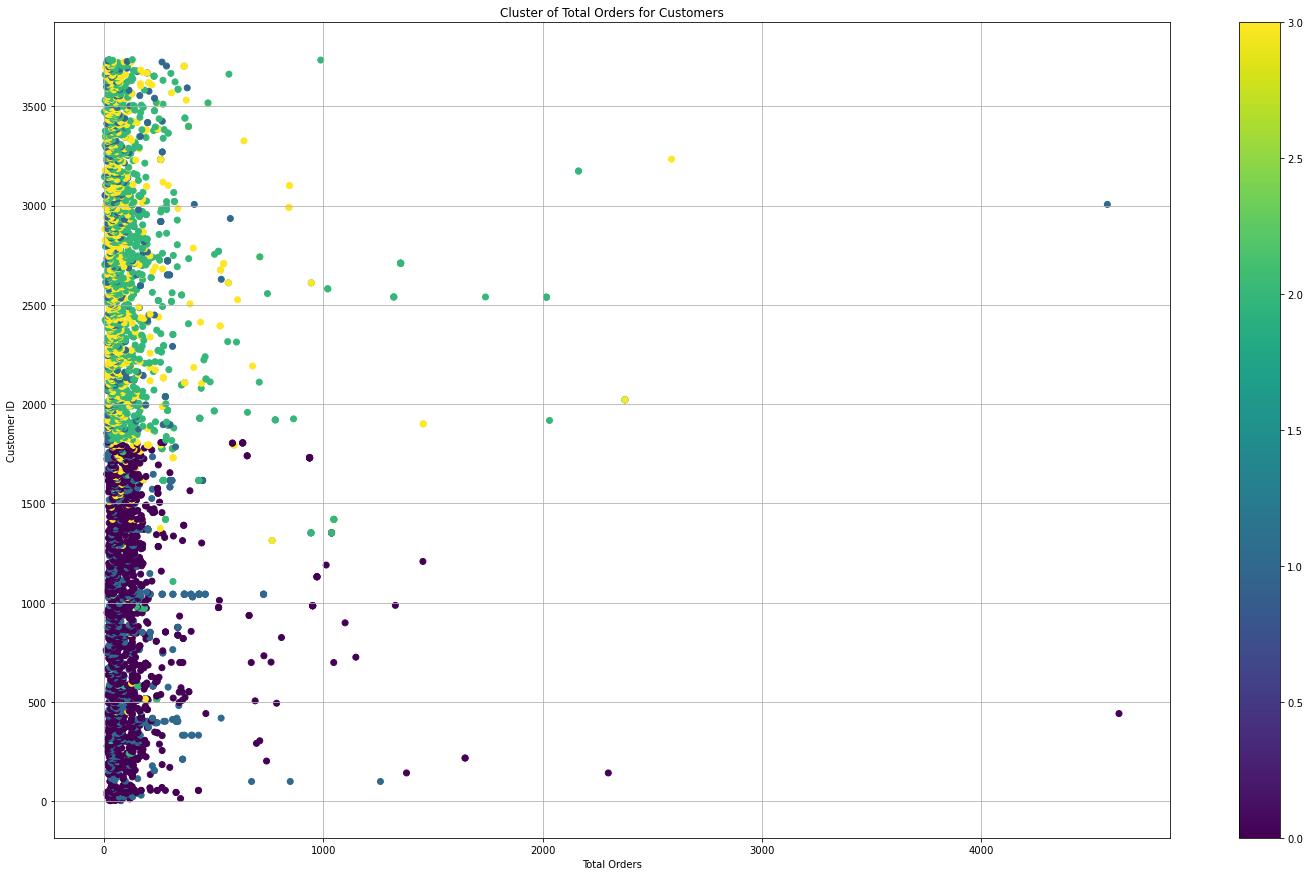

In [96]:
plt.figure(figsize=(25,15))
plt.scatter(x["Orders.total"],x["Customers.id"],c=tahmin);
plt.title("Cluster of Total Orders for Customers")
plt.xlabel("Total Orders")
plt.ylabel("Customer ID")
plt.colorbar()
plt.grid()

In [97]:
allscore = []
allclusters = []
uzakliklar = []

# clustere göre score'in degismesi
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i, " score ",score)
        #score ve uzaklik yukardaki listelere eklememiz lazim
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster  2  score  0.6072100121617643
Cluster  3  score  0.4901044863029155
Cluster  4  score  0.5334792722139617
Cluster  5  score  0.5446684420729055
Cluster  6  score  0.5373339078704641
Cluster  7  score  0.5590617998917483
Cluster  8  score  0.5554662002127575
Cluster  9  score  0.5690648189169062
Cluster  10  score  0.537557957113806
Cluster  11  score  0.4961010677149044


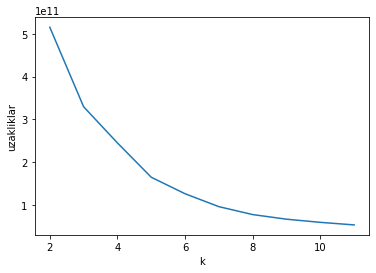

In [98]:
# bunun grafigini cizelim
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar);
#grafik nerde kiriliyor, orda durmamiz gerekiyor

In [38]:
# pca ile bir dene 

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA(n_components=2) # number of components=2 --> 2 sutün

In [41]:
x=pca.fit_transform(df_new)

In [42]:
x

array([[ 1.77673721e+13, -2.27769228e+10],
       [ 1.85715714e+13, -2.38078679e+10],
       [-1.14284040e+13,  1.46506683e+10],
       ...,
       [-3.48593211e+08, -2.71923720e+11],
       [ 1.85721743e+13,  4.46454027e+11],
       [-1.42841217e+12,  1.83115616e+09]])

In [43]:
pca.explained_variance_ratio_ #verinin 91% birinci sutünda, 5% ikinci sutünda 

array([9.99730841e-01, 2.69159367e-04])

In [44]:
df_y=pd.DataFrame(x)

In [45]:
df_y

,0,1
0,1.776737e+13,-2.277692e+10
1,1.857157e+13,-2.380787e+10
2,-1.142840e+13,1.465067e+10
3,6.028533e+08,4.702619e+11
4,-4.831542e+01,9.161033e+01
...,...,...
4189,2.776695e+13,-3.695261e+11
4190,-4.280819e+08,-3.339297e+11
4191,-3.485932e+08,-2.719237e+11
4192,1.857217e+13,4.464540e+11


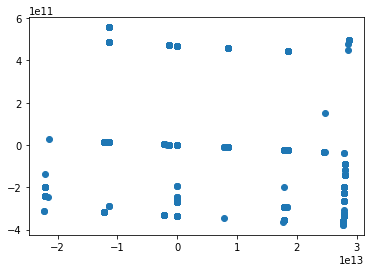

In [49]:
plt.scatter(df_y.loc[:,0],df_y.loc[:,1]);

In [47]:
sum(pca.explained_variance_ratio_) # verinin tam hepsini almiyor, kayip 1%

0.9999999999868279

In [48]:
df.select_dtypes(include=['object'])

,Customers.fname,Customers.lname,Customers.company,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.external_source,Orders.currency,Orders.fee_name,Orders.discount_name,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_id,Orders.payment_code,Orders.comments,Orders.notes,Order_Items.product_name,Order_Items.attribute_names,Products.template,Products.name,Products.display_name,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.thefind_cat,Products.quickbooks_id,Products.short_description,Products.long_description,Products.video,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_url,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.rx,Products.latex,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.notes,Products.features_title,Products.warranty,Products.user_size,Products.assembly,Products.installation,Products.handling_time,Products.rotation_link,Products.product_option,Products.size,Products.material,Products.arm_style,Products.seat_size,Products.family_id
0,Christy,Dill,Company0,Christy,Dill,Company0,3758,NaN,USD,NaN,NaN,fedex,11|Ground,5.7204E+14,NaN,authorize.net,NaN,6993607863,510142,NaN,Insured By Eye4Fraud,"Basic Rollators, Green",NaN,sub-product-detail.html,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",MEDLINE,MDS86850EGS,NaN,Green,NaN,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,8000064C-1434298761,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071
1,John,Smith,Company1,John,Smith,Company1,23,NaN,USD,NaN,NaN,fedex,11|Ground,1.28597E+14,NaN,authorize.net,NaN,0,0,NaN,NaN,"Urinary Drain Bags,0.000",NaN,sub-product-detail.html,Urinary Drain Bags,Urinary Drain Bags,MEDLINE,DYNC1674H,NaN,NaN,NaN,B000QF7Y76,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,NaN,Urinary Drain Bags | MEDLINE - DYNC1674H,NaN,NaN,NaN,Urinary-Drain-Bags0000,EA,1 Each / Each,NaN,1 EA,Rx,Yes,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,OFF sale cause it is an RX item,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132
2,John,Smith,Company1,John,Smith,Company1,9531,NaN,USD,NaN,NaN,manual,0|Standard Shipping,NaN,genlee166,authorize.net,NaN,0,0,test order,Test,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,sub-product-detail.html,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",MEDLINE,484805,NaN,Blue,NaN,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,NaN,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBl